In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
import os
import win32com.client
import PyPDF2
import re
import string
from docx import Document
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spacy import displacy
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve,roc_auc_score,classification_report,brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Import Resumes

### SQL Developer Resumes

In [3]:
# Function to read text .doc format
def read_doc_document(doc_path):
    word = win32com.client.Dispatch("Word.Application")
    doc = word.Documents.Open(doc_path)
    text = doc.Content.Text
    doc.Close()
    word.Quit()
    return text

In [4]:
# Function to read pdf format 
def read_pdf_document(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = [page.extract_text() for page in pdf_reader.pages]
    return ' '.join(text)

In [5]:
# Function to read .docx format
def read_docx_document(docx_path):
    doc = Document(docx_path)
    text = ' '.join([paragraph.text for paragraph in doc.paragraphs])
    return text

In [6]:
# List of SQL Developer Resumes
os.listdir('/Users/J M Salian/ExcelR/PROJECT/P333_NLP/Resumes/SQL Developer Lightning insight')

['Anil kumar.docx',
 'AradhanaTripathi[4_0].docx',
 'Buddha Vamsi.docx',
 'kamballapradeep.docx',
 'Nazeer Basha.doc',
 'Neeraj Mishra.docx',
 'premsai.docx',
 'Priyanka L.doc',
 'PSyamKumar[2_3].docx',
 'Rajupavanakumari[2_10].docx',
 'Ramalakshmi K.docx',
 'RameshNataru[3_4].docx',
 'Tatikonda Kiran Kumar.doc',
 'Vinod B.docx']

In [7]:
# Extracting SQL Developer Resumes
directory_sql = '/Users/J M Salian/ExcelR/PROJECT/P333_NLP/Resumes/SQL Developer Lightning insight'
resumes_data_sql = []
labels_sql = []
for file_name in os.listdir(directory_sql):
    if file_name.endswith('.docx') or file_name.endswith('.doc'):
        file_path = os.path.join(directory_sql, file_name)
        # Extract text from Word document
        if file_name.endswith('.docx'):
            text = read_docx_document(file_path)
        elif file_name.endswith('.doc'):
        # Extract text from older Word document (.doc)
            text = read_doc_document(file_path)
        # Append the extracted text and label to the lists
        resumes_data_sql.append(text)
        labels_sql.append('SQL Developer')

In [8]:
resumes_data_sql, labels_sql

(['ANIL KUMAR MADDUKURI  \t\t SQL & MSBI Developer     \t  Summary  2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools. Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables. Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms. Hands on experience in creation, optimization and debugging Stored Procedure and Functions. Familiar in writing queries using CTE, Temporary Tables and Table Variables. Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data. Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions. Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services. Used containers such as for each loop container and 

In [9]:
# SQL Develper Resume DataFrame
sql_df = pd.DataFrame({'Resumes': resumes_data_sql, 'Category': labels_sql})
sql_df

Resumes       Category
0   ANIL KUMAR MADDUKURI  \t\t SQL & MSBI Develope...  SQL Developer
1    Aradhana Tripathi  Current Location: Gachibow...  SQL Developer
2   BUDDHA VAMSI                                  ...  SQL Developer
3   KAMBALLA PRADEEP                              ...  SQL Developer
4   
\r\r Hyderabad\rNazeer Basha\rSQL and Power...  SQL Developer
5                                             Resu...  SQL Developer
6   SQL DEVELOPER Name: -   Bandi prem sai   Willi...  SQL Developer
7                                          SQL SER...  SQL Developer
8                                          SQL SER...  SQL Developer
9    RAJU PAVANA KUMARI   Professional Summary: Ha...  SQL Developer
10                                      resume   R...  SQL Developer
11  Name: Ramesh  Career Objective:               ...  SQL Developer
12  Career objective\r\t\rA rewarding opportunity ...  SQL Developer
13  B. vinod kumar  OBJECTIVE: Willing to work und...  SQL Developer

In [10]:
# sql_df Count
sql_df.count()

Resumes     14
Category    14
dtype: int64

### Peoplesoft Resumes

In [11]:
# List of Peoplesoft Resumes
os.listdir('/Users/J M Salian/ExcelR/PROJECT/P333_NLP/Resumes/Peoplesoft resumes')

['Peoplesoft Admin_AnubhavSingh.docx',
 'Peoplesoft Admin_G Ananda Rayudu.doc',
 'Peoplesoft Admin_Gangareddy.doc',
 'Peoplesoft Admin_Murali.docx',
 'Peoplesoft Admin_Priyanka Ramadoss.doc',
 'Peoplesoft Admin_SirazuddinMohammad.docx',
 'Peoplesoft Admin_srinivasarao.doc',
 'Peoplesoft Admin_Varkala Vikas.docx',
 'Peoplesoft Admin_Vinod Akkala.doc',
 'PeopleSoft DBA_Ganesh Alladi.doc',
 'PeopleSoft DBA_Vivekanand Sayana.docx',
 'Peoplesoft Finance_Arun Venu.doc',
 'Peoplesoft Finance_Pritam Biswas.doc',
 'Peoplesoft Finance_Rahul Ahuja.doc',
 'Peoplesoft FSCM_HariNarayana.docx',
 'Peoplesoft FSCM_Murali.docx',
 'Peoplesoft FSCM_PriyabrataHota.docx',
 'Peoplesoft FSCM_R Ahmed.doc',
 'Peoplesoft FSCM_SUJATHA.docx',
 'Resume_Subha Santosh_Peoplesoft FSCM.docx']

In [12]:
# Extracting Peoplesoft Resumes
directory_ps = '/Users/J M Salian/ExcelR/PROJECT/P333_NLP/Resumes/Peoplesoft resumes'
resumes_data_ps = []
labels_ps = []
for file_name in os.listdir(directory_ps):
    if file_name.endswith('.docx') or file_name.endswith('.doc'):
        file_path = os.path.join(directory_ps, file_name)
        
        if file_name.endswith('.docx'):
            text = read_docx_document(file_path)
        elif file_name.endswith('.doc'):
            text = read_doc_document(file_path)
                
        resumes_data_ps.append(text)
        labels_ps.append('Peoplesoft')

In [13]:
resumes_data_ps,labels_ps

(['  Anubhav Kumar Singh\t\t    To work in a globally competitive environment on    challenging assignments that shall yield the    twin benefits of the job satisfaction and a steady-paced    professional growth.                Professional Experience   06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t \t\t\tCurrent Role: System Admin Offshore \t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github  Managing PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS. Involved in Day to Day activities such as Project Migration, Database Refresh, System admin changes, Tax updates etc. Troubleshooting of various servers like application servers, Web Servers, Process Scheduler Servers. Applying Tuxedo and WebLogic Middleware CPU patches for various applications. Working on shell scripting used as integration method for exchange of files to external systems Installation and troubleshooting of 2-tier setup as per r

In [14]:
# Peoplesoft Resumes DataFrame
peoplesoft_df = pd.DataFrame({'Resumes': resumes_data_ps, 'Category': labels_ps})
peoplesoft_df

Resumes    Category
0     Anubhav Kumar Singh\t\t    To work in a glob...  Peoplesoft
1   \r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...  Peoplesoft
2   PeopleSoft Database Administrator\r           ...  Peoplesoft
3   Murali  Experience Summary   I have 6 years of...  Peoplesoft
4   Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...  Peoplesoft
5                 PROFILE SUMMARY  I have overall ...  Peoplesoft
6   PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...  Peoplesoft
7    PeopleSoft Admin VARKALA VIKAS  Career Object...  Peoplesoft
8   Vinod Akkala                                  ...  Peoplesoft
9    PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...  Peoplesoft
10  PeopleSoft Administration   Vivekanand Sayana ...  Peoplesoft
11  Arun Venu\r\r  EXPERIENCE SUMMARY\t\r\rExperie...  Peoplesoft
12  Personal Details\t\t\r\rName\rPritam Biswas...  Peoplesoft
13  Rahul Ahuja\r---------------------------------...  Peoplesoft
14   Having 4.6 years of experience in PeopleSoft ...  Peoplesoft
15   Having 4.6 years of experience in PeopleSoft ...  Peoplesoft
16     CAREER OBJECTIVE\t\t  Pursuing Peoplesoft E...  Peoplesoft
17  \rR Ahmed                                     ...  Peoplesoft
18  Tanna Sujatha     OBJECTIVE Seeking a challeng...  Peoplesoft
19                      C O N T A C T :  Address: ...  Peoplesoft

In [15]:
# peoplesoft_df count
peoplesoft_df.count()

Resumes     20
Category    20
dtype: int64

### Workday resumes

In [16]:
# List of Workday Resumes
os.listdir('/Users/J M Salian/ExcelR/PROJECT/P333_NLP/Resumes/workday resumes')

['ChinnaSubbarayuduM_Hexaware.docx',
 'Gopi Krishna_Hexaware.docx',
 'Hari Krishna M_Hexaware.doc',
 'Harikrishna Akula_Hexaware.doc',
 'Hima Mendu_Hexaware.doc',
 'Himaja G_(Hexaware).docx',
 'J. Sumanth Royal_Hexaware.doc',
 'Jyotiverma_Heaware.docx',
 'Madeeswar A_Hexaware.doc',
 'MooraboyinaGuravaiah_Hexaware.docx',
 'Naresh Babu Cherukuri_Hexaware.doc',
 'P V Sai Krishna_ Hexaware.docx',
 'Punugoti Swetha_Hexaware.doc',
 'RahulM_Hexaware.docx',
 'RameshP_Hexaware.docx',
 'ShireeshKumar_Hexaware.doc',
 'Sri Krishna S_Hexaware.doc',
 'Srikanth-Hexaware.docx',
 'SSKumar_Hexaware.docx',
 'Venkateswarlu B_Hexaware.doc',
 'Vinay Kumar_Hexaware.docx']

In [17]:
# Extracting Workday Resumes
directory_work = '/Users/J M Salian/ExcelR/PROJECT/P333_NLP/Resumes/workday resumes'
resumes_data_work = []
labels_work = []
for file_name in os.listdir(directory_work):
    if file_name.endswith('.docx') or file_name.endswith('.doc'):
        file_path = os.path.join(directory_work, file_name)
        
        if file_name.endswith('.docx'):
            text = read_docx_document(file_path)
        elif file_name.endswith('.doc'):
            text = read_doc_document(file_path)
                
        resumes_data_work.append(text)
        labels_work.append('Workday')

In [18]:
resumes_data_work,labels_work

(['Chinna Subbarayudu M DOB: 06th March 1994 Nationality: Indian \t PROFILE SUMMARY:  Having around 5.1 years of IT experience in developing and Implementation of ERP technology by using Workday HCM and ETL (informatica) technologies. 3.6 years of experience as Workday Integration Consultant and involved in a maintenance and implementation. Experience in all phases in Workday like requirements gathering, Analysis, Design, Development and Testing. Hands on experience in inbound/ outbound integrations using core connector, Workday studio, managing business processes, working with EIB, report writer. Developed and maintained custom-report types (Advanced, Matrix, Composite) using report writer tool. Involved in transformation of XML into XSLT for presenting data for different web Services. Building Workday Integration (EIB), calculated fields, Custom Reports and Writing XSLT transformation code. Developed testing\xa0strategies and validation scenarios along with project Scope and Requirem

In [19]:
# Workday Resumes DataFrame
workday_df = pd.DataFrame({'Resumes': resumes_data_work, 'Category': labels_work})
workday_df

Resumes Category
0   Chinna Subbarayudu M DOB: 06th March 1994 Nati...  Workday
1   \t   Name         : Gopi Krishna Reddy \t\t   ...  Workday
2   Hari Krishna M\r\r\rSummary:\rA result oriente...  Workday
3   Harikrishna Akula                             ...  Workday
4   HIMA.MENDU\r  \r\rCareer Objective\rTo continu...  Workday
5                                                 ...  Workday
6   \t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...  Workday
7     JYOTI VERMA\t\t\t\t\t    3 years of Experien...  Workday
8   \t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...  Workday
9     Mooraboyina Guravaiah Workday Integration Sp...  Workday
10  Name\t: Naresh Babu Cherukuri\r\rObjective:\rT...  Workday
11  VENKATA SAIKRISHNA  Workday Consultant   PROFS...  Workday
12  \r\r\r3.3 years of IT experience as Workda...  Workday
13  Rahul  (Techno Functional Consultant)   Profes...  Workday
14  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  Workday
15  Shireesh Balasani                             ...  Workday
16  \tWorkday Integration Consultant\r\rName      ...  Workday
17  Seeking suitable positions in Workday HCM  as ...  Workday
18   WORKDAY | HCM | FCM Name \t\t: Kumar S.S Role...  Workday
19  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...  Workday
20                                                ...  Workday

In [20]:
# workday_df count
workday_df.count()

Resumes     21
Category    21
dtype: int64

### React Developer Resumes

In [21]:
# List of React Developer Resumes
os.listdir('/Users/J M Salian/ExcelR/PROJECT/P333_NLP/Resumes/React Dev')

['React Developer_Deepakreddy.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_PavasGoswami.doc',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Vinay Reddy.doc',
 'React Dev_Krishna Kanth.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'Reactjs Developer_Ranga Gaganam_M

In [22]:
# Extracting React Developer Resumes
directory_react = '/Users/J M Salian/ExcelR/PROJECT/P333_NLP/Resumes/React Dev'
resumes_data_react = []
labels_react = []
for file_name in os.listdir(directory_react):
    if file_name.endswith('.docx') or file_name.endswith('.doc') or file_name.endswith('.pdf'):
        file_path = os.path.join(directory_react, file_name)
        
        if file_name.endswith('.docx'):
            text = read_docx_document(file_path)
        elif file_name.endswith('.doc'):
            text = read_doc_document(file_path)
        elif file_name.endswith('.pdf'):
            text = read_pdf_document(file_path)
                
        resumes_data_react.append(text)
        labels_react.append('React Developer')

In [23]:
resumes_data_react,labels_react

(['Kanumuru Deepak Reddy    CAREER OBJECTIVE:  To secure a position in a reputed organization where I can efficiently contribute my knowledge and skills to the growth of the organization and build my professional career.  ACADEMIC QUALIFICATIONS:    PROJECT:  Title\t:Density based Traffic Control System USING ARDUINO.  Duration:4 months.  Description: Traffic congestion is a severe problem in most of the cities across the world and it has become a nightmare for the citizens. It is caused by delay in signal, inappropriate timing of traffic signalling etc. The delay of traffic light is hard coded and it does not depend on traffic. Therefore, for optimising traffic control, there is an increasing demand in systematic quick automatic system. This project is designed to develop a density based dynamic traffic signal control. The signal timing changes automatically on sensing the traffic density at the junction. The microcontroller used in this project is ARDUINO. The system contains IR sens

In [24]:
# React Developer Resumes DataFrame
react_df = pd.DataFrame({'Resumes': resumes_data_react, 'Category': labels_react})
react_df

Resumes         Category
0   Kanumuru Deepak Reddy    CAREER OBJECTIVE:  To...  React Developer
1   HARIPRIYA BATTINA  Experience as UI Developer ...  React Developer
2   KAMALAKAR REDDY. A  Linked In: https://www.lin...  React Developer
3    Naveen Sadhu   Title: software developer\t\t\...  React Developer
4   \r\r
PROFILE\rSearching for the opportunity ...  React Developer
5     PRAGNYA PATTNAIK        Expertise:    Having...  React Developer
6      204,Sri geethika prestige,road number 10,b...  React Developer
7   \n Thirupathamma Balla  SUMMARY:  2.8 year of ...  React Developer
8   Maryala Vinay Reddy\r\rProfessional Summary:\t...  React Developer
9    Ui-Developer/ React JS Developer  NAME: KRISH...  React Developer
10   Ui-Developer/ React JS Developer  NAME: KRISH...  React Developer
11  CURRICULUM VITAE\r\r\r\rAnjani Priyadarshini\r...  React Developer
12  Kotani Durga Prasad   Objective:  Aspirant for...  React Developer
13  Venkatalakshmi Pedireddy Software Developer Ex...  React Developer
14  KAMBALA SAI SURENDRA      \tMandepeta \t      ...  React Developer
15  MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW    A...  React Developer
16  MAREEDU LOKESH BABU  PROFESSIONAL OVERVIEW    ...  React Developer
17  MD KHIZARUDDIN RAUF   \t EXPERIENCE        ⇨ C...  React Developer
18     \nPage | 1  \n Name: M. Prabakaran  \nTitle...  React Developer
19   Pranish Sonone \t     Career summary:   Exper...  React Developer
20  Ranga Gaganam       Having 1+ years of success...  React Developer
21  SHAIK ABDUL SHARUK    2 years’ Experience in W...  React Developer

In [25]:
# react_df count
react_df.count()

Resumes     22
Category    22
dtype: int64

### Internship resumes

In [26]:
# List of Internship Resumes
os.listdir('/Users/J M Salian/ExcelR/PROJECT/P333_NLP/Resumes/Internship')

['Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx']

In [27]:
# Extracting Intern Resumes
directory_intern = '/Users/J M Salian/ExcelR/PROJECT/P333_NLP/Resumes/Internship'
resumes_data_intern = []
labels_intern = []
for file_name in os.listdir(directory_intern):
    if file_name.endswith('.docx'):
        file_path = os.path.join(directory_intern, file_name)
        if file_name.endswith('.docx'):
            text = read_docx_document(file_path)        
        resumes_data_intern.append(text)
        labels_intern.append('Internship')

In [28]:
resumes_data_intern,labels_intern

(['Name: Ravali P                                                                                Curriculum Vitae                                            Specialization: BE (computer science and Engg)       To utilize my technical skills for achieving the target and developing the best performance in organization.          \t    MANUAL TESTING SKILLS       Strong knowledge in SDLC concepts.     Extensive knowledge in White Box Testing.     Good knowledge in Functional testing, Integration testing,     Extreme Knowledge on System Testing     Good knowledge in Adhoc Testing, Reliability testing.    Good Knowledge on Exploratory Testing    Good knowledge in STLC concepts.     Good knowledge in Test cases and Test scenarios.     Good knowledge in globalization testing, compatibility testing.    Through Knowledge on Regression Testing    Good  knowledge in Test plan.            AGILE METHDOLOGY       Good knowledge on Scrum Methodology.    Expertise in Sprint Planning Meeting.     Good k

In [29]:
# Intern Resumes DataFrame
intern_df = pd.DataFrame({'Resumes': resumes_data_intern, 'Category': labels_intern})
intern_df

Resumes    Category
0  Name: Ravali P                                ...  Internship
1     SUSOVAN  BAG    Seeking  a  challenging  po...  Internship

In [30]:
# intern_df count
intern_df.count()

Resumes     2
Category    2
dtype: int64

### Combined Data

In [31]:
# Concatenate all dataframes into one
df = pd.concat([sql_df, peoplesoft_df, workday_df, react_df, intern_df], ignore_index=True)
df

Resumes         Category
0   ANIL KUMAR MADDUKURI  \t\t SQL & MSBI Develope...    SQL Developer
1    Aradhana Tripathi  Current Location: Gachibow...    SQL Developer
2   BUDDHA VAMSI                                  ...    SQL Developer
3   KAMBALLA PRADEEP                              ...    SQL Developer
4   
\r\r Hyderabad\rNazeer Basha\rSQL and Power...    SQL Developer
..                                                ...              ...
74   Pranish Sonone \t     Career summary:   Exper...  React Developer
75  Ranga Gaganam       Having 1+ years of success...  React Developer
76  SHAIK ABDUL SHARUK    2 years’ Experience in W...  React Developer
77  Name: Ravali P                                ...       Internship
78     SUSOVAN  BAG    Seeking  a  challenging  po...       Internship

[79 rows x 2 columns]

In [32]:
# Count
df.count()

Resumes     79
Category    79
dtype: int64

In [33]:
# Save the DataFrame to CSV
#csv_path = '/Users/J M Salian/ExcelR/PROJECT/P333_NLP/merged_resumes.csv'
#df.to_csv(csv_path, index=False)

In [34]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [35]:
df['Category'].nunique()

5

In [36]:
# No. of resumes contained in each category
df['Category'].value_counts()

React Developer    22
Workday            21
Peoplesoft         20
SQL Developer      14
Internship          2
Name: Category, dtype: int64

## Vizualization

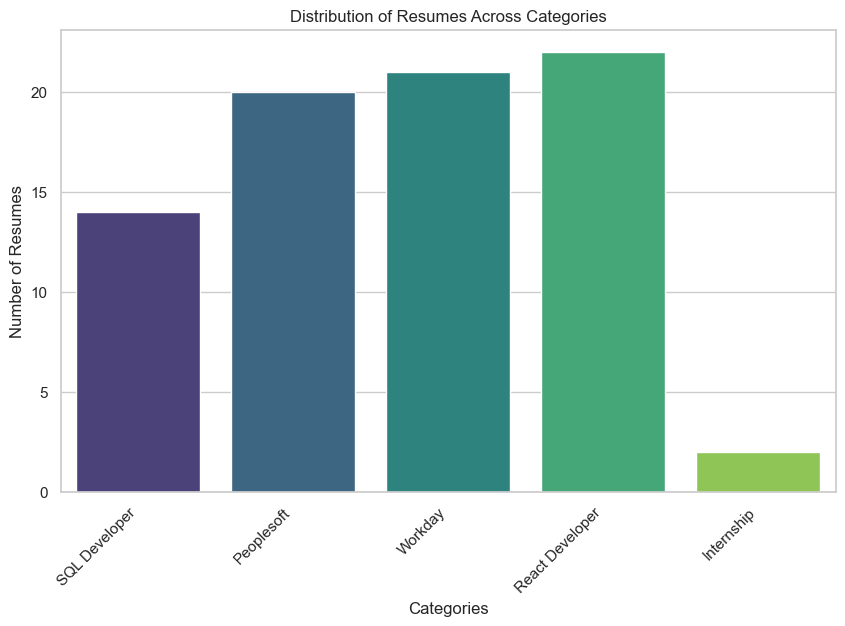

In [37]:
# Resume distribution across various categories
category_counts = df['Category'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Distribution of Resumes Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Resumes')
plt.xticks(rotation=45, ha='right')
plt.show()

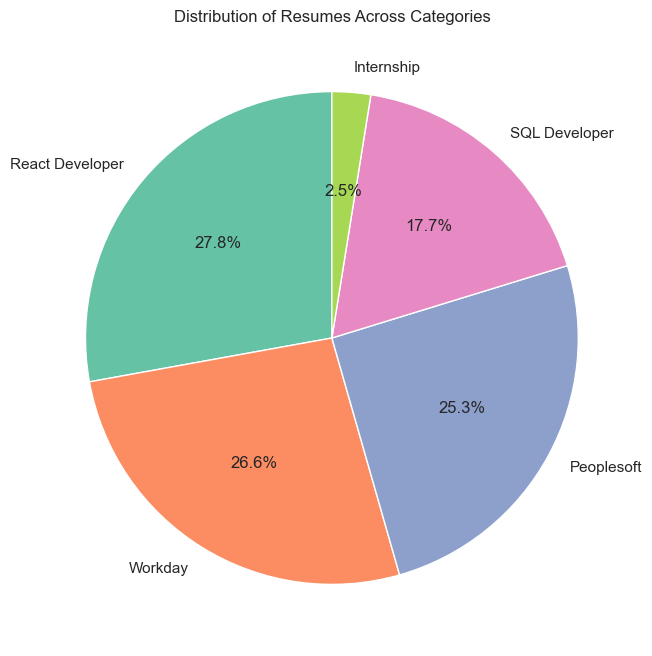

In [38]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribution of Resumes Across Categories')
plt.show()

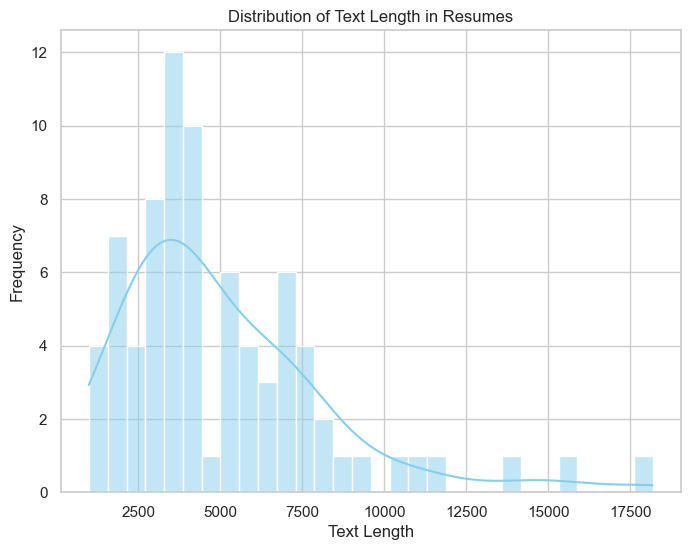

In [39]:
# Text Length Distribution
df['Text Length'] = df['Resumes'].apply(len)
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df['Text Length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Text Length in Resumes')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

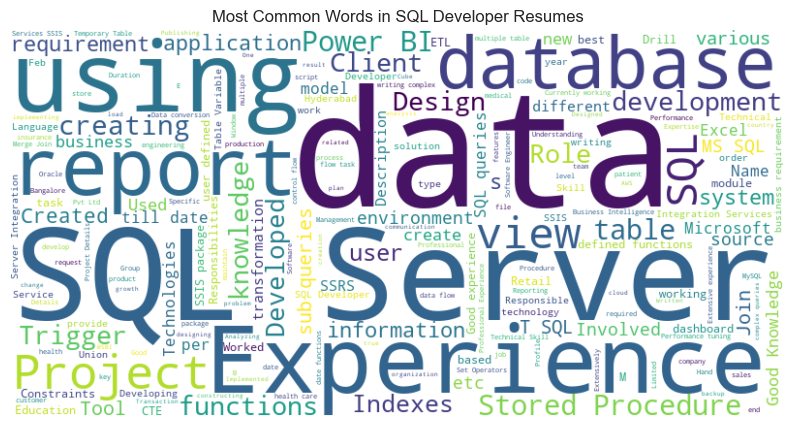

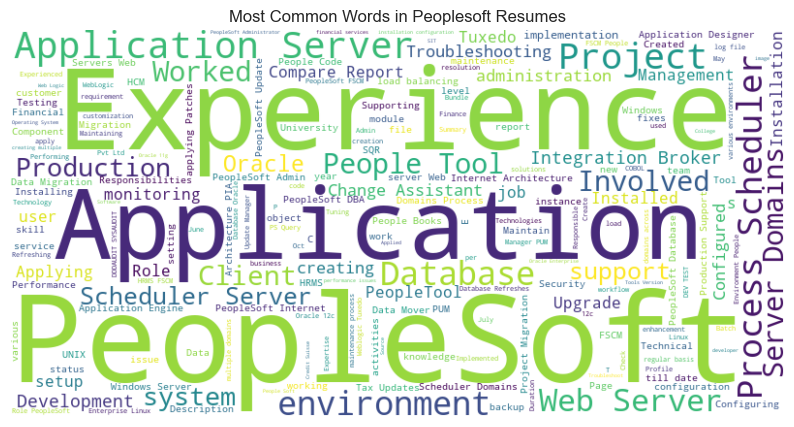

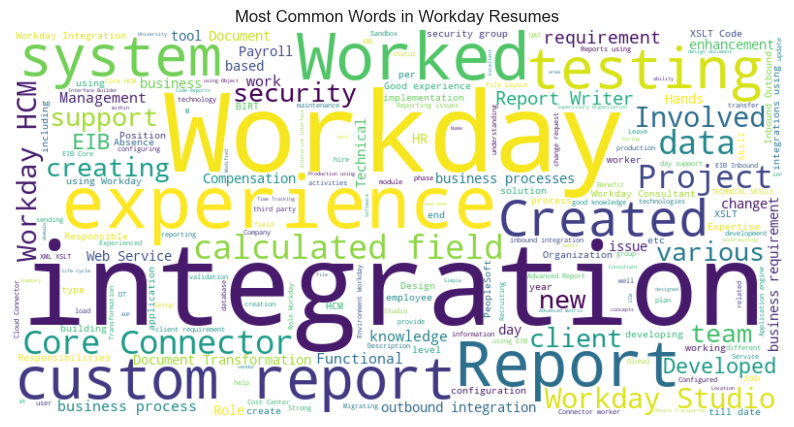

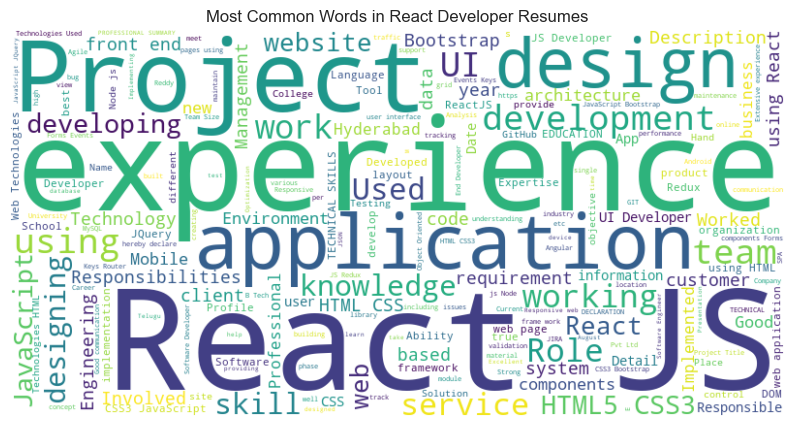

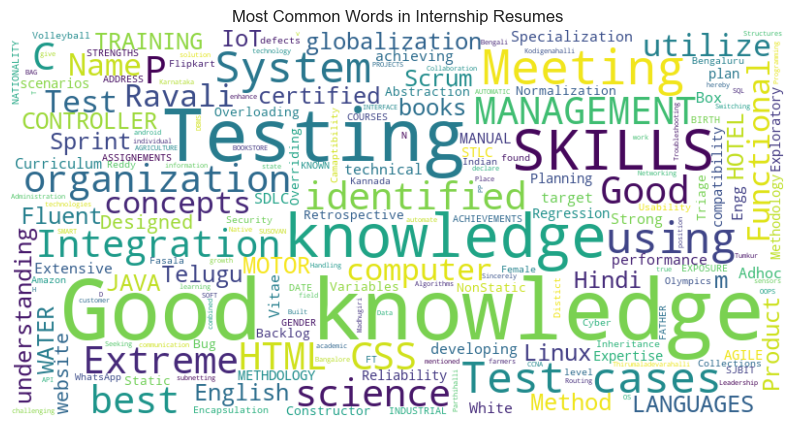

In [40]:
# WordCloud
categories = df['Category'].unique()
# Generate word clouds for each category
for category in categories:
    text = ' '.join(df[df['Category'] == category]['Resumes'])
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Common Words in {category} Resumes')
    plt.axis('off')
    plt.show()

## Data Processing and EDA

In [41]:
df1 = df.copy()

In [42]:
# Convert all text to lowercase
df1['Resumes'] = df1['Resumes'].str.lower()
df1

Resumes         Category  \
0   anil kumar maddukuri  \t\t sql & msbi develope...    SQL Developer   
1    aradhana tripathi  current location: gachibow...    SQL Developer   
2   buddha vamsi                                  ...    SQL Developer   
3   kamballa pradeep                              ...    SQL Developer   
4   
\r\r hyderabad\rnazeer basha\rsql and power...    SQL Developer   
..                                                ...              ...   
74   pranish sonone \t     career summary:   exper...  React Developer   
75  ranga gaganam       having 1+ years of success...  React Developer   
76  shaik abdul sharuk    2 years’ experience in w...  React Developer   
77  name: ravali p                                ...       Internship   
78     susovan  bag    seeking  a  challenging  po...       Internship   

    Text Length  
0          4377  
1          5089  
2          1693  
3          1917  
4          7578  
..          ...  
74         1548  
75         1625  
76         1440  
77         3498  
78         1667  

[79 rows x 3 columns]

In [43]:
# Remove leading and trailing whitespaces
df1['Resumes'] = df1['Resumes'].str.strip()

In [44]:
# Removing URLs,mentions,hastags,whitespaces etc
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove RT and CC
    text = re.sub(r'\bRT\b|\bCC\b', '', text, flags=re.MULTILINE)
    # Remove mentions (@username)
    text = re.sub(r'@\S+', '', text, flags=re.MULTILINE)
    # Remove hashtags
    text = re.sub(r'#\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespaces
    text = ' '.join(text.split())
    return text
df1['Resumes'] = df1['Resumes'].apply(clean_text)
df1

Resumes         Category  \
0   anil kumar maddukuri sql msbi developer summar...    SQL Developer   
1   aradhana tripathi current location gachibowli ...    SQL Developer   
2   buddha vamsi career objective have years of it...    SQL Developer   
3   kamballa pradeep synopsis looking forward to a...    SQL Developer   
4   hyderabad nazeer basha sql and power bi develo...    SQL Developer   
..                                                ...              ...   
74  pranish sonone career summary experience of ye...  React Developer   
75  ranga gaganam having years of successful it ex...  React Developer   
76  shaik abdul sharuk years experience in wipro c...  React Developer   
77  name ravali p curriculum vitae specialization ...       Internship   
78  susovan bag seeking a challenging position in ...       Internship   

    Text Length  
0          4377  
1          5089  
2          1693  
3          1917  
4          7578  
..          ...  
74         1548  
75         1625  
76         1440  
77         3498  
78         1667  

[79 rows x 3 columns]

In [45]:
# Stopwords removal
nltk.download('stopwords')
# Define the set of stopwords
stop_words = set(stopwords.words('english'))
# Define a function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df1['Resumes'] = df1['Resumes'].apply(remove_stopwords)
df1

[nltk_data] Downloading package stopwords to C:\Users\J M
[nltk_data]     Salian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Resumes         Category  \
0   anil kumar maddukuri sql msbi developer summar...    SQL Developer   
1   aradhana tripathi current location gachibowli ...    SQL Developer   
2   buddha vamsi career objective years experience...    SQL Developer   
3   kamballa pradeep synopsis looking forward aspi...    SQL Developer   
4   hyderabad nazeer basha sql power bi developer ...    SQL Developer   
..                                                ...              ...   
74  pranish sonone career summary experience years...  React Developer   
75  ranga gaganam years successful experience phas...  React Developer   
76  shaik abdul sharuk years experience wipro care...  React Developer   
77  name ravali p curriculum vitae specialization ...       Internship   
78  susovan bag seeking challenging position field...       Internship   

    Text Length  
0          4377  
1          5089  
2          1693  
3          1917  
4          7578  
..          ...  
74         1548  
75         1625  
76         1440  
77         3498  
78         1667  

[79 rows x 3 columns]

In [46]:
# Remove Punctuations
# Define a function to remove punctuations
def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
df1['Resumes'] = df1['Resumes'].apply(remove_punctuations)
df1

Resumes         Category  \
0   anil kumar maddukuri sql msbi developer summar...    SQL Developer   
1   aradhana tripathi current location gachibowli ...    SQL Developer   
2   buddha vamsi career objective years experience...    SQL Developer   
3   kamballa pradeep synopsis looking forward aspi...    SQL Developer   
4   hyderabad nazeer basha sql power bi developer ...    SQL Developer   
..                                                ...              ...   
74  pranish sonone career summary experience years...  React Developer   
75  ranga gaganam years successful experience phas...  React Developer   
76  shaik abdul sharuk years experience wipro care...  React Developer   
77  name ravali p curriculum vitae specialization ...       Internship   
78  susovan bag seeking challenging position field...       Internship   

    Text Length  
0          4377  
1          5089  
2          1693  
3          1917  
4          7578  
..          ...  
74         1548  
75         1625  
76         1440  
77         3498  
78         1667  

[79 rows x 3 columns]

In [47]:
# Lemmatization
nltk.download('wordnet')
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
# Define a function to perform lemmatization
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)
df1['Resumes'] = df1['Resumes'].apply(lemmatize_text)
df1

[nltk_data] Downloading package wordnet to C:\Users\J M
[nltk_data]     Salian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Resumes         Category  \
0   anil kumar maddukuri sql msbi developer summar...    SQL Developer   
1   aradhana tripathi current location gachibowli ...    SQL Developer   
2   buddha vamsi career objective year experience ...    SQL Developer   
3   kamballa pradeep synopsis looking forward aspi...    SQL Developer   
4   hyderabad nazeer basha sql power bi developer ...    SQL Developer   
..                                                ...              ...   
74  pranish sonone career summary experience year ...  React Developer   
75  ranga gaganam year successful experience phase...  React Developer   
76  shaik abdul sharuk year experience wipro caree...  React Developer   
77  name ravali p curriculum vitae specialization ...       Internship   
78  susovan bag seeking challenging position field...       Internship   

    Text Length  
0          4377  
1          5089  
2          1693  
3          1917  
4          7578  
..          ...  
74         1548  
75         1625  
76         1440  
77         3498  
78         1667  

[79 rows x 3 columns]

In [48]:
# Obtain Resumes column in list format
resumes_list = df1['Resumes'].tolist()
resumes_list

['anil kumar maddukuri sql msbi developer summary year experience m sql server ssms creating ssis package ssrs report using microsoft business intelligence msbi tool expertise various type join sub query writing complex query involving multiple table handled data manipulation data consistency creating view trigger synonym hand experience creation optimization debugging stored procedure function familiar writing query using cte temporary table table variable good experience using set operator like union union except intersect assist required data experience manipulate data multiple table report client using aggregate function window function string function worked extensively data extraction transformation loading etl process sql server integration service used container loop container sequence container load data multiple source file database table expertise using task like data flow task execute sql task control flow task execute package task execute process task bulk insert task send

In [49]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [50]:
# Apply NER and display for each resume
for index, row in df.iterrows():
    resume_text = row['Resumes']
    doc = nlp(resume_text)
    
    # Display NER entities using spaCy's visualization
    displacy.render(doc, style="ent", jupyter=True, options={'distance': 110})

In [51]:
# Function to extract technical skills from text
def extract_skills(text):
    doc = nlp(text.lower())
    skills = []

    skill_keywords = ['sql','t-sql','sas','python','r','aws','mariadb',
                      'tableau','excel','oracle','mysql','java','html','css','bootstrap',
                      'pig','hive','hbase','impala','scala','database','pl/sql','peoplesoft',
                      'peoplecode','hrms','fscm','crm','cs','hcm','portal','workday','report writer',
                      'calculated fields','react js','json','xml', 'javascript','css3', 'webpack', 'npm',
                      'eib', 'core connector', 'application engine', 'sqr'
                     ]

    for keyword in skill_keywords:
        if keyword in text.lower():
            skills.append(keyword)

    return skills

In [52]:
df1['Extracted_Skills'] = df1['Resumes'].apply(extract_skills)
df1

Resumes         Category  \
0   anil kumar maddukuri sql msbi developer summar...    SQL Developer   
1   aradhana tripathi current location gachibowli ...    SQL Developer   
2   buddha vamsi career objective year experience ...    SQL Developer   
3   kamballa pradeep synopsis looking forward aspi...    SQL Developer   
4   hyderabad nazeer basha sql power bi developer ...    SQL Developer   
..                                                ...              ...   
74  pranish sonone career summary experience year ...  React Developer   
75  ranga gaganam year successful experience phase...  React Developer   
76  shaik abdul sharuk year experience wipro caree...  React Developer   
77  name ravali p curriculum vitae specialization ...       Internship   
78  susovan bag seeking challenging position field...       Internship   

    Text Length                                   Extracted_Skills  
0          4377                      [sql, r, excel, database, cs]  
1          5089  [sql, python, r, aws, mariadb, tableau, excel,...  
2          1693                     [sql, r, oracle, database, cs]  
3          1917                          [sql, r, excel, database]  
4          7578              [sql, r, excel, database, cs, portal]  
..          ...                                                ...  
74         1548            [r, java, html, cs, portal, javascript]  
75         1625                    [r, java, html, cs, javascript]  
76         1440                                                [r]  
77         3498                                      [r, java, cs]  
78         1667          [sql, r, java, html, css, cs, javascript]  

[79 rows x 4 columns]

In [53]:
# Tokenization
nltk.download('punkt')
tokens = df1['Resumes'].apply(word_tokenize)
tokens

[nltk_data] Downloading package punkt to C:\Users\J M
[nltk_data]     Salian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     [anil, kumar, maddukuri, sql, msbi, developer,...
1     [aradhana, tripathi, current, location, gachib...
2     [buddha, vamsi, career, objective, year, exper...
3     [kamballa, pradeep, synopsis, looking, forward...
4     [hyderabad, nazeer, basha, sql, power, bi, dev...
                            ...                        
74    [pranish, sonone, career, summary, experience,...
75    [ranga, gaganam, year, successful, experience,...
76    [shaik, abdul, sharuk, year, experience, wipro...
77    [name, ravali, p, curriculum, vitae, specializ...
78    [susovan, bag, seeking, challenging, position,...
Name: Resumes, Length: 79, dtype: object

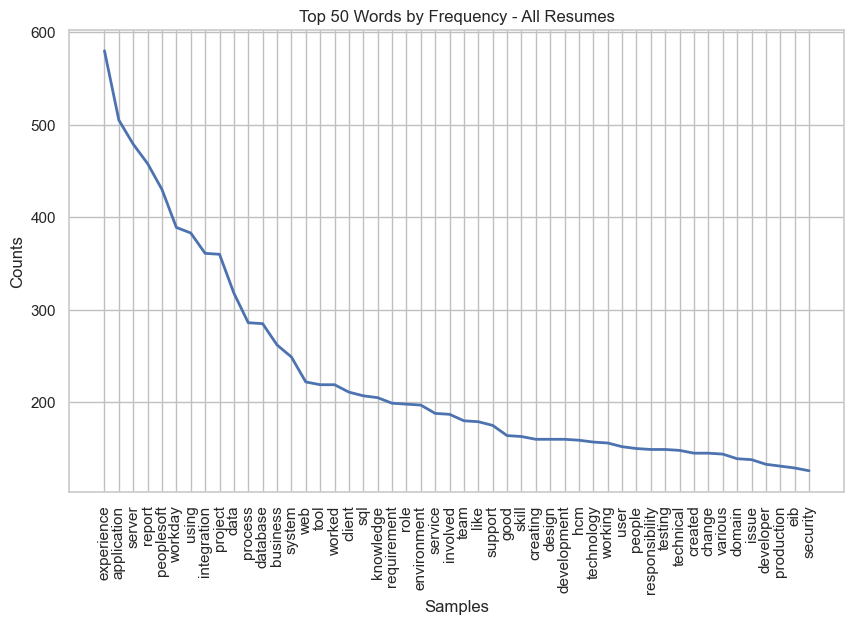

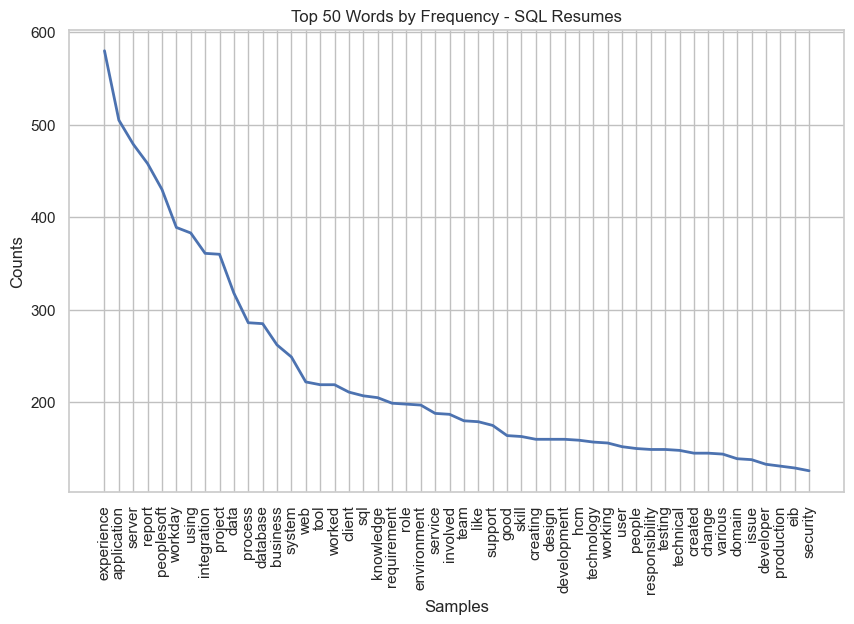

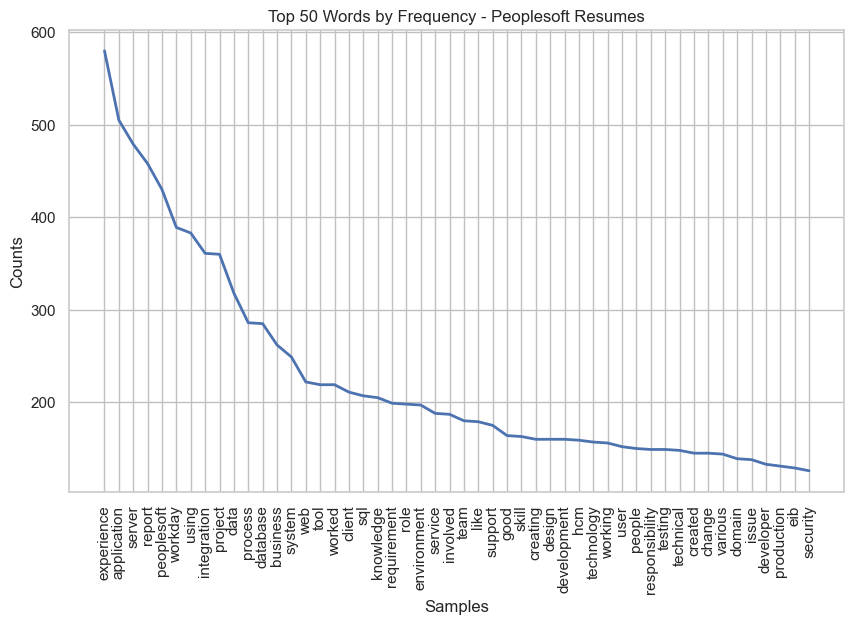

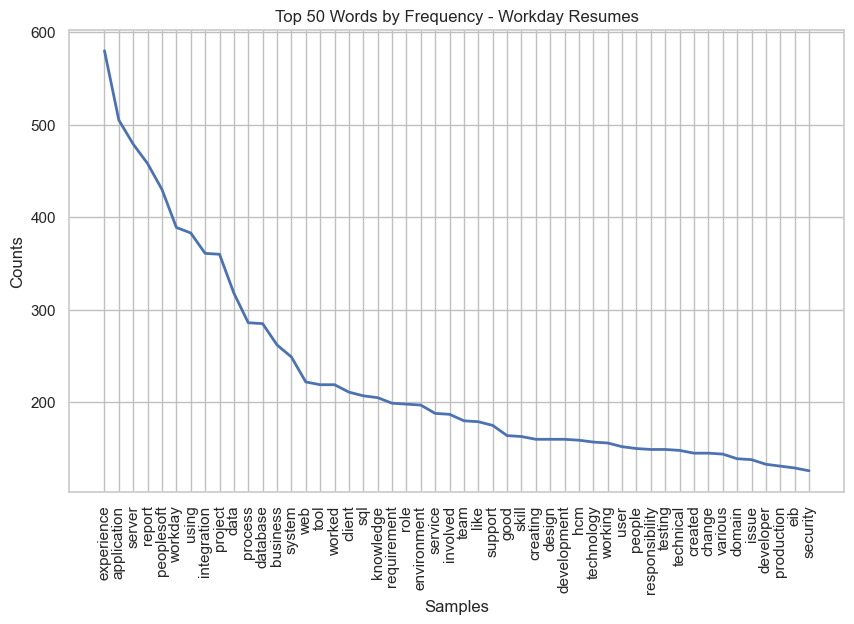

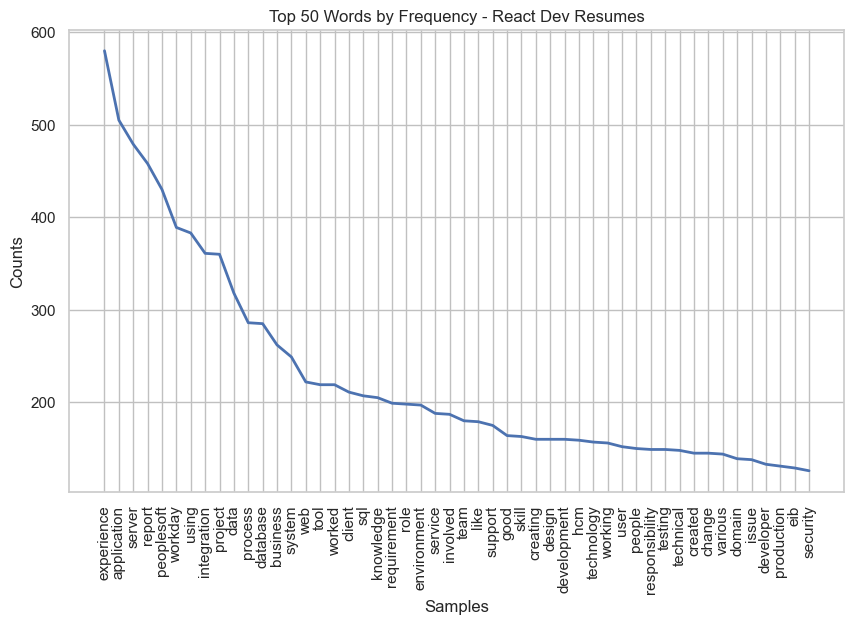

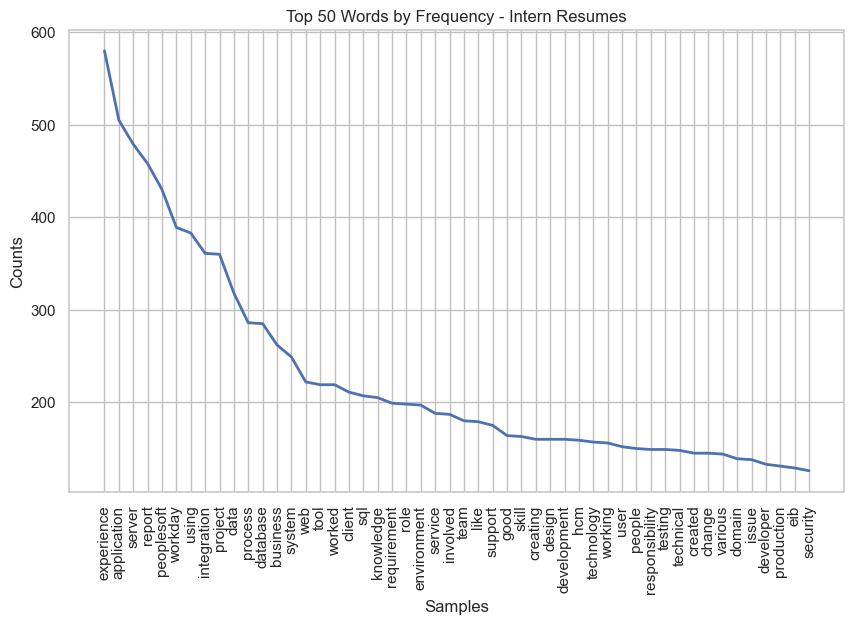

In [54]:
# Word Frequency Analysis
def word_frequency_analysis(dataframe, title):
    # Tokenize each element in the 'Resumes' column using apply
    df1['Tokenized_Resumes'] = df1['Resumes'].apply(lambda x: word_tokenize(x))

    # Flatten the list of lists to get a single list of all tokens
    all_tokens = [token for sublist in df1['Tokenized_Resumes'] for token in sublist]

    # Create a frequency distribution of words
    frequency_distribution = FreqDist(all_tokens)

    # Plot the top N words by frequency
    plt.figure(figsize=(10, 6))
    top_words = 50
    plt.title(f'Top {top_words} Words by Frequency - {title}')
    frequency_distribution.plot(top_words, cumulative=False)
    plt.show()

# Applying the function to each DataFrame
word_frequency_analysis(df1, 'All Resumes')
word_frequency_analysis(sql_df, 'SQL Resumes')
word_frequency_analysis(peoplesoft_df, 'Peoplesoft Resumes')
word_frequency_analysis(workday_df, 'Workday Resumes')
word_frequency_analysis(react_df, 'React Dev Resumes')
word_frequency_analysis(intern_df, 'Intern Resumes')

## Encoding and Vectorization

In [55]:
# Label Encoding 
final_df = df1.copy()
columns_to_drop = ['Text Length','Extracted_Skills','Tokenized_Resumes']
final_df.drop(columns_to_drop, axis=1, inplace=True)
encoder = LabelEncoder()
final_df['Encoded_Category'] = encoder.fit_transform(final_df['Category'])
final_df

Resumes         Category  \
0   anil kumar maddukuri sql msbi developer summar...    SQL Developer   
1   aradhana tripathi current location gachibowli ...    SQL Developer   
2   buddha vamsi career objective year experience ...    SQL Developer   
3   kamballa pradeep synopsis looking forward aspi...    SQL Developer   
4   hyderabad nazeer basha sql power bi developer ...    SQL Developer   
..                                                ...              ...   
74  pranish sonone career summary experience year ...  React Developer   
75  ranga gaganam year successful experience phase...  React Developer   
76  shaik abdul sharuk year experience wipro caree...  React Developer   
77  name ravali p curriculum vitae specialization ...       Internship   
78  susovan bag seeking challenging position field...       Internship   

    Encoded_Category  
0                  3  
1                  3  
2                  3  
3                  3  
4                  3  
..               ...  
74                 2  
75                 2  
76                 2  
77                 0  
78                 0  

[79 rows x 3 columns]

In [56]:
# Mapping which category has been assigned what value
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
mapping

{'Internship': 0,
 'Peoplesoft': 1,
 'React Developer': 2,
 'SQL Developer': 3,
 'Workday': 4}

In [57]:
# Convert Text Data to Numeric Data

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the 'Resumes' column to get TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(final_df['Resumes'])
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Concatenate the TF-IDF DataFrame with the original 'final_df'
vectorized_df = pd.concat([final_df, tfidf_df], axis=1)
drop_columns = ['Resumes','Category']
vectorized_df.drop(drop_columns, axis=1, inplace=True)
vectorized_df

Encoded_Category   aa   ab     abdul  abilitiescommunication   ability  \
0                  3  0.0  0.0  0.000000                     0.0  0.000000   
1                  3  0.0  0.0  0.000000                     0.0  0.000000   
2                  3  0.0  0.0  0.000000                     0.0  0.000000   
3                  3  0.0  0.0  0.000000                     0.0  0.045813   
4                  3  0.0  0.0  0.000000                     0.0  0.000000   
..               ...  ...  ...       ...                     ...       ...   
74                 2  0.0  0.0  0.000000                     0.0  0.000000   
75                 2  0.0  0.0  0.000000                     0.0  0.000000   
76                 2  0.0  0.0  0.217566                     0.0  0.000000   
77                 0  0.0  0.0  0.000000                     0.0  0.000000   
78                 0  0.0  0.0  0.000000                     0.0  0.000000   

    able  abovementioned  abreast  absence  ...  youll  young  youre  \
0    0.0        0.000000      0.0      0.0  ...    0.0    0.0    0.0   
1    0.0        0.000000      0.0      0.0  ...    0.0    0.0    0.0   
2    0.0        0.000000      0.0      0.0  ...    0.0    0.0    0.0   
3    0.0        0.000000      0.0      0.0  ...    0.0    0.0    0.0   
4    0.0        0.000000      0.0      0.0  ...    0.0    0.0    0.0   
..   ...             ...      ...      ...  ...    ...    ...    ...   
74   0.0        0.000000      0.0      0.0  ...    0.0    0.0    0.0   
75   0.0        0.000000      0.0      0.0  ...    0.0    0.0    0.0   
76   0.0        0.000000      0.0      0.0  ...    0.0    0.0    0.0   
77   0.0        0.055904      0.0      0.0  ...    0.0    0.0    0.0   
78   0.0        0.000000      0.0      0.0  ...    0.0    0.0    0.0   

    yoursincerely   yr  zealand  zenefits  zero  zone   zp  
0        0.000000  0.0      0.0       0.0   0.0   0.0  0.0  
1        0.000000  0.0      0.0       0.0   0.0   0.0  0.0  
2        0.000000  0.0      0.0       0.0   0.0   0.0  0.0  
3        0.000000  0.0      0.0       0.0   0.0   0.0  0.0  
4        0.000000  0.0      0.0       0.0   0.0   0.0  0.0  
..            ...  ...      ...       ...   ...   ...  ...  
74       0.000000  0.0      0.0       0.0   0.0   0.0  0.0  
75       0.000000  0.0      0.0       0.0   0.0   0.0  0.0  
76       0.000000  0.0      0.0       0.0   0.0   0.0  0.0  
77       0.069482  0.0      0.0       0.0   0.0   0.0  0.0  
78       0.000000  0.0      0.0       0.0   0.0   0.0  0.0  

[79 rows x 4211 columns]

In [58]:
vectorized_df.shape

(79, 4211)

## Data Partition

In [59]:
# X and y values
X = vectorized_df.iloc[:,1:4214]
y = vectorized_df.iloc[:,0:1]

In [60]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 42)

In [61]:
X_train.shape, y_train.shape

((52, 4210), (52, 1))

In [62]:
X_test.shape, y_test.shape

((27, 4210), (27, 1))

## Classification Models

### Logistic Regression

In [63]:
# Fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [64]:
# Training predicted data
ytrain_pred_log = logreg.predict(X_train)
ytrain_pred_log

array([4, 1, 4, 2, 2, 3, 4, 4, 1, 2, 1, 4, 3, 2, 3, 1, 4, 3, 2, 3, 4, 2,
       2, 4, 2, 1, 1, 4, 1, 4, 1, 4, 2, 2, 3, 1, 2, 2, 2, 2, 4, 1, 3, 4,
       1, 3, 1, 1, 2, 2, 1, 4])

In [65]:
# Classification Report (Training Data)
print("Classification report for Training data: \n",classification_report(y_train, ytrain_pred_log))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        14
           2       0.88      1.00      0.93        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14

    accuracy                           0.96        52
   macro avg       0.78      0.80      0.79        52
weighted avg       0.93      0.96      0.94        52



In [66]:
# Testing predicted data
ytest_pred_log = logreg.predict(X_test)

In [67]:
# Classification Report (Testing Data)
print("Classification report for Testing data: \n",classification_report(y_test, ytest_pred_log))

Classification report for Testing data: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.80      1.00      0.89         8
           3       1.00      0.67      0.80         6
           4       1.00      1.00      1.00         7

    accuracy                           0.93        27
   macro avg       0.95      0.92      0.92        27
weighted avg       0.94      0.93      0.92        27



In [68]:
# Accuracy Score
print("Accuracy Score of Training data: ",accuracy_score(y_train, ytrain_pred_log).round(2))
print("Accuracy Score of Testing data: ",accuracy_score(y_test, ytest_pred_log).round(2))

Accuracy Score of Training data:  0.96
Accuracy Score of Testing data:  0.93


### Naive Bayes Classifier

In [69]:
# Fit Naive Bayes Model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [70]:
# Training predicted data
ytrain_pred_mnb = mnb.predict(X_train)
ytrain_pred_mnb

array([4, 1, 4, 2, 2, 3, 4, 4, 1, 2, 1, 4, 3, 2, 3, 1, 4, 3, 2, 3, 4, 2,
       2, 4, 4, 1, 1, 4, 1, 4, 1, 4, 2, 2, 3, 1, 2, 2, 2, 2, 4, 1, 3, 4,
       1, 3, 1, 1, 2, 2, 1, 4])

In [71]:
# Classification Report (Training Data)
print("Classification report for Training data: \n",classification_report(y_train, ytrain_pred_mnb))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8
           4       0.93      1.00      0.97        14

    accuracy                           0.96        52
   macro avg       0.77      0.80      0.79        52
weighted avg       0.93      0.96      0.94        52



In [72]:
# Testing predicted data
ytest_pred_mnb = mnb.predict(X_test)

In [73]:
# Classification Report (Testing Data)
print("Classification report for Testing data: \n",classification_report(y_test, ytest_pred_mnb))

Classification report for Testing data: 
               precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         8
           3       1.00      0.50      0.67         6
           4       0.78      1.00      0.88         7

    accuracy                           0.89        27
   macro avg       0.91      0.88      0.87        27
weighted avg       0.91      0.89      0.88        27



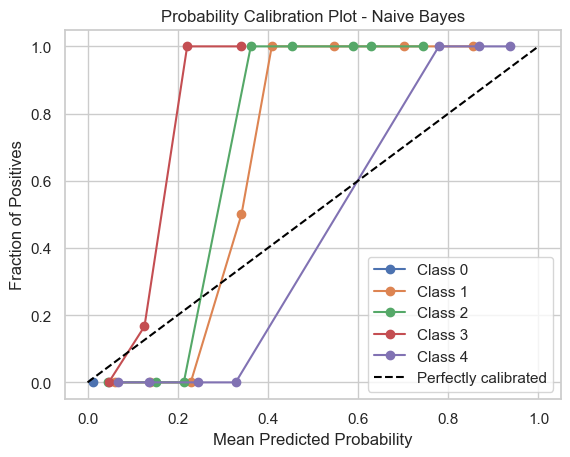

In [74]:
# Calibration plot for each class
ytrain_prob_mnb = mnb.predict_proba(X_train)
ytest_prob_mnb = mnb.predict_proba(X_test)
for i in range(len(mnb.classes_)):
    prob_true, prob_pred = calibration_curve(y_test == mnb.classes_[i], ytest_prob_mnb[:, i], n_bins=10)
    
    plt.plot(prob_pred, prob_true, marker='o', label=f'Class {mnb.classes_[i]}')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Probability Calibration Plot - Naive Bayes')
plt.legend()
plt.show()

In [75]:
# Accuracy Score
print("Accuracy Score of Training data: ",accuracy_score(y_train, ytrain_pred_mnb).round(2))
print("Accuracy Score of Testing data: ",accuracy_score(y_test, ytest_pred_mnb).round(2))

Accuracy Score of Training data:  0.96
Accuracy Score of Testing data:  0.89


### KNN

In [76]:
# Finding best k value
training_acc = []
testing_acc = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    training_acc.append(accuracy_score(y_train, y_pred_train).round(2))
    testing_acc.append(accuracy_score(y_test, y_pred_test).round(2))
print(training_acc)
print(testing_acc)

[1.0, 0.98, 0.98, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [77]:
Range = pd.DataFrame({'Range': range(1, 10)})
Training_Accuracy = pd.DataFrame({'Training_Accuracy': training_acc})
Testing_Accuracy = pd.DataFrame({'Testing_Accuracy': testing_acc})

result_df = pd.concat([Range, Training_Accuracy, Testing_Accuracy], axis=1)
print(result_df)

   Range  Training_Accuracy  Testing_Accuracy
0      1               1.00               1.0
1      2               0.98               1.0
2      3               0.98               1.0
3      4               0.96               1.0
4      5               0.96               1.0
5      6               0.96               1.0
6      7               0.96               1.0
7      8               0.96               1.0
8      9               0.96               1.0


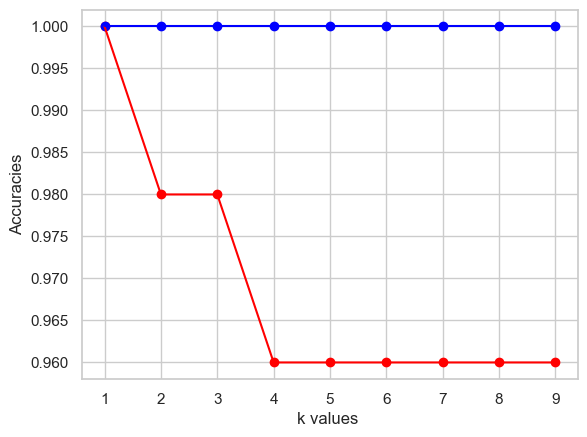

In [78]:
# Accuracy comparison plot
plt.scatter(Range, Training_Accuracy, color='Red')
plt.plot(Range, Training_Accuracy, color='Red')
plt.scatter(Range, Testing_Accuracy, color='blue')
plt.plot(Range, Testing_Accuracy, color='blue')
plt.xlabel("k values ")
plt.ylabel('Accuracies')
plt.show()

In [79]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [80]:
# Parameter grid
param_grid_knn = {
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski','euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'brute'],
}

In [81]:
# Grid search cross- validation
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ['auto', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev'],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [82]:
# Print the best value of parameters
best_weights = grid_search_knn.best_params_['weights']
best_metric = grid_search_knn.best_params_['metric']
best_algorithm = grid_search_knn.best_params_['algorithm']
print(f"Best Weights: {best_weights}\nBest Metric: {best_metric}\nBest Algorithm: {best_algorithm}")

Best Weights: uniform
Best Metric: minkowski
Best Algorithm: auto


In [83]:
# Fit KNN Model
knn = KNeighborsClassifier(n_neighbors=3,weights='uniform',metric='minkowski',algorithm='auto')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
# Training predicted data
ytrain_pred_knn = knn.predict(X_train)
ytrain_pred_knn

array([4, 1, 4, 2, 2, 3, 4, 4, 1, 2, 1, 4, 3, 2, 3, 1, 4, 3, 2, 3, 4, 2,
       2, 4, 0, 1, 1, 4, 1, 4, 1, 4, 2, 2, 3, 1, 2, 2, 2, 2, 4, 1, 3, 4,
       1, 3, 1, 1, 2, 2, 1, 4])

In [85]:
# Classification Report (Training Data)
print("Classification report for Training data: \n",classification_report(y_train, ytrain_pred_knn))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14

    accuracy                           0.98        52
   macro avg       0.99      0.90      0.93        52
weighted avg       0.98      0.98      0.98        52



In [86]:
# Testing predicted data
ytest_pred_knn = knn.predict(X_test)

In [87]:
# Classification Report (Testing Data)
print("Classification report for Testing data: \n",classification_report(y_test, ytest_pred_knn))

Classification report for Testing data: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [88]:
# Accuracy Score
print("Accuracy Score of Training data: ",accuracy_score(y_train, ytrain_pred_knn).round(2))
print("Accuracy Score of Testing data: ",accuracy_score(y_test, ytest_pred_knn).round(2))

Accuracy Score of Training data:  0.98
Accuracy Score of Testing data:  1.0


### Decision Tree Classifier

In [89]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [90]:
param_grid_dt = {
    'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'],
    'max_leaf_nodes': [None, 5, 6, 7, 8, 9, 10, 15, 20, 50],
}

In [91]:
# Grid search cross- validation
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [None, 5, 6, 7, 8, 9, 10, 15, 20,
                                            50]},
             scoring='accuracy')

In [92]:
# Print the best value of parameters
best_max_depth = grid_search_dt.best_params_['max_depth']
best_criterion = grid_search_dt.best_params_['criterion']
best_class_weight = grid_search_dt.best_params_['class_weight']
best_max_leaf_nodes = grid_search_dt.best_params_['max_leaf_nodes']
print(f"Best Max Depth: {best_max_depth}\nBest Criterion: {best_criterion}\nBest Class Weight: {best_class_weight}\nBest Max Leaf Nodes: {best_max_leaf_nodes}")

Best Max Depth: None
Best Criterion: gini
Best Class Weight: balanced
Best Max Leaf Nodes: None


In [93]:
# Fit Decision Tree Model
dt = DecisionTreeClassifier(criterion='gini', class_weight= 'balanced',random_state=42,)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

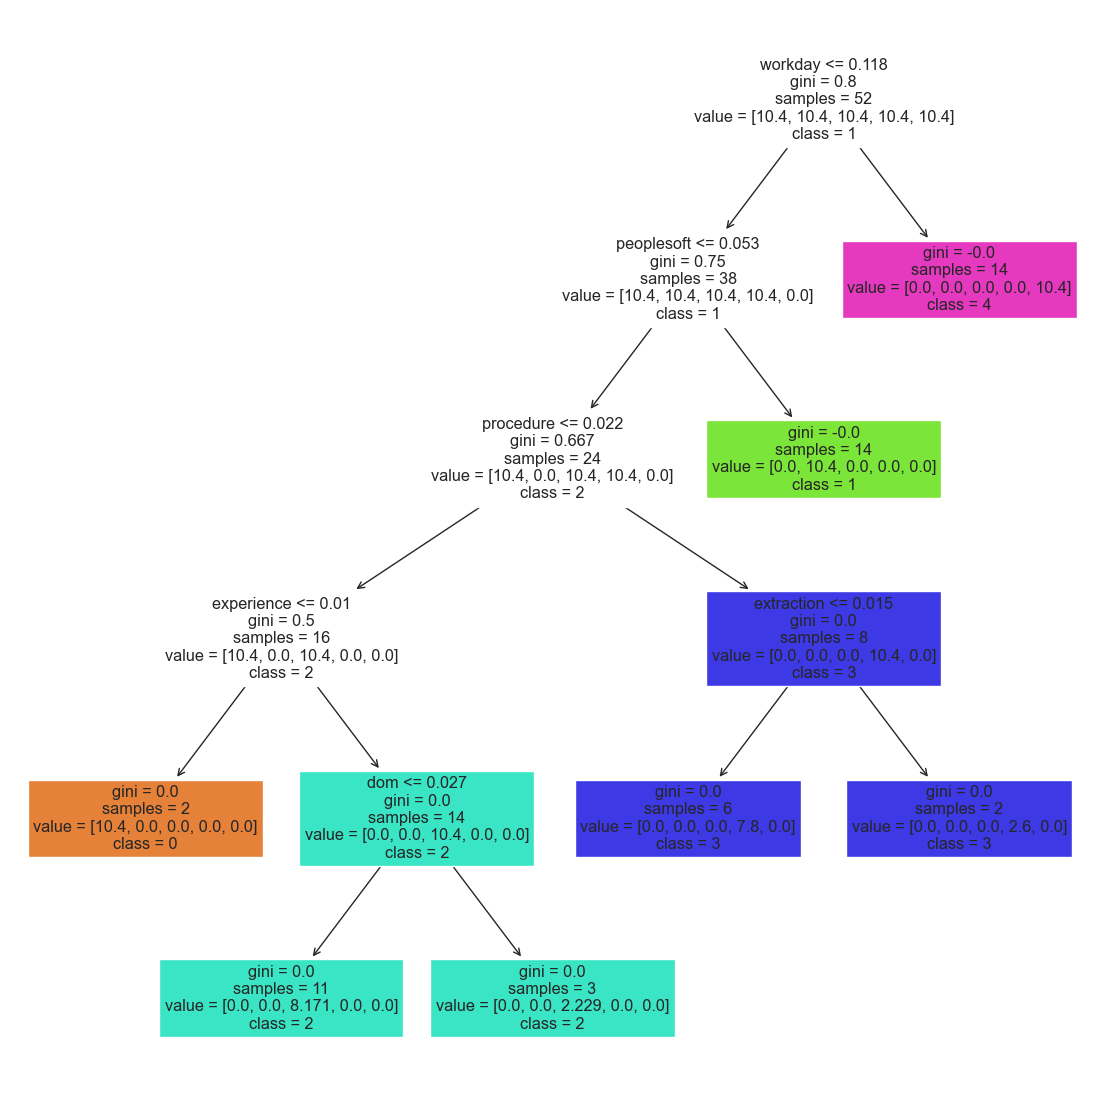

In [94]:
# Decision Tree Plot
features = X.columns.values
classes = ['0','1','2','3','4']
fig, axes = plt.subplots(figsize = (14,14))
tree.plot_tree(dt, feature_names=features, class_names=classes, filled=True )
plt.show()

In [95]:
# Training predicted data
ytrain_pred_dt = dt.predict(X_train)
ytrain_pred_dt

array([4, 1, 4, 2, 0, 3, 4, 4, 1, 2, 1, 4, 3, 2, 3, 1, 4, 3, 2, 3, 4, 2,
       2, 4, 0, 1, 1, 4, 1, 4, 1, 4, 2, 2, 3, 1, 2, 2, 2, 2, 4, 1, 3, 4,
       1, 3, 1, 1, 2, 2, 1, 4])

In [96]:
# Classification Report (Training Data)
print("Classification report for Training data: \n",classification_report(y_train, ytrain_pred_dt))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



In [97]:
# Testing predicted data
ytest_pred_dt = dt.predict(X_test)

In [98]:
# Classification Report (Testing Data)
print("Classification report for Testing data: \n",classification_report(y_test, ytest_pred_dt))

Classification report for Testing data: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [99]:
# Accuracy Score
print("Accuracy Score of Training data: ",accuracy_score(y_train, ytrain_pred_dt).round(2))
print("Accuracy Score of Testing data: ",accuracy_score(y_test, ytest_pred_dt).round(2))

Accuracy Score of Training data:  1.0
Accuracy Score of Testing data:  1.0


### Random Forest Classifier

In [100]:
# Fit Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
rf.n_estimators

100

In [102]:
rf.max_features

'sqrt'

In [103]:
# Training predicted data
ytrain_pred_rf = rf.predict(X_train)
ytrain_pred_rf

array([4, 1, 4, 2, 0, 3, 4, 4, 1, 2, 1, 4, 3, 2, 3, 1, 4, 3, 2, 3, 4, 2,
       2, 4, 0, 1, 1, 4, 1, 4, 1, 4, 2, 2, 3, 1, 2, 2, 2, 2, 4, 1, 3, 4,
       1, 3, 1, 1, 2, 2, 1, 4])

In [104]:
# Classification Report (Training Data)
print("Classification report for Training data: \n",classification_report(y_train, ytrain_pred_rf))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



In [105]:
# Testing predicted data
ytest_pred_rf = rf.predict(X_test)

In [106]:
# Classification Report (Testing Data)
print("Classification report for Testing data: \n",classification_report(y_test, ytest_pred_rf))

Classification report for Testing data: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [107]:
# Accuracy Score
print("Accuracy Score of Training data: ",accuracy_score(y_train, ytrain_pred_rf).round(2))
print("Accuracy Score of Testing data: ",accuracy_score(y_test, ytest_pred_rf).round(2))

Accuracy Score of Training data:  1.0
Accuracy Score of Testing data:  1.0


### SVM Classifier

In [108]:
# Fit SVM Model
svc = SVC(C = 1.0, kernel = 'linear',gamma ='scale', class_weight= 'balanced', probability=True, random_state=42)
svc.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)

In [109]:
# Training predicted data
ytrain_pred_svc = svc.predict(X_train)
ytrain_pred_svc

array([4, 1, 4, 2, 0, 3, 4, 4, 1, 2, 1, 4, 3, 2, 3, 1, 4, 3, 2, 3, 4, 2,
       2, 4, 0, 1, 1, 4, 1, 4, 1, 4, 2, 2, 3, 1, 2, 2, 2, 2, 4, 1, 3, 4,
       1, 3, 1, 1, 2, 2, 1, 4])

In [110]:
# Classification Report (Training Data)
print("Classification report for Training data: \n",classification_report(y_train, ytrain_pred_svc))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



In [111]:
# Testing predicted data
ytest_pred_svc = svc.predict(X_test)

In [112]:
# Classification Report (Testing Data)
print("Classification report for Testing data: \n",classification_report(y_test, ytest_pred_svc))

Classification report for Testing data: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [113]:
# Accuracy Score
print("Accuracy Score of Training data: ",accuracy_score(y_train, ytrain_pred_svc).round(2))
print("Accuracy Score of Testing data: ",accuracy_score(y_test, ytest_pred_svc).round(2))

Accuracy Score of Training data:  1.0
Accuracy Score of Testing data:  1.0


### AdaBoost Classifier

In [114]:
# Fit AdaBoost
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [115]:
# Training predicted data
ytrain_pred_ab = ab.predict(X_train)
ytrain_pred_ab

array([4, 1, 4, 1, 1, 3, 4, 4, 1, 1, 1, 4, 3, 1, 3, 1, 4, 3, 1, 3, 4, 1,
       1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 3, 4,
       1, 3, 1, 1, 1, 1, 1, 4])

In [116]:
# Classification Report (Training Data)
print("Classification report for Training data: \n",classification_report(y_train, ytrain_pred_ab))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.47      1.00      0.64        14
           2       0.00      0.00      0.00        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14

    accuracy                           0.69        52
   macro avg       0.49      0.60      0.53        52
weighted avg       0.55      0.69      0.59        52



In [117]:
# Testing predicted data
ytest_pred_ab = ab.predict(X_test)

In [118]:
# Classification Report (Testing Data)
print("Classification report for Testing data: \n",classification_report(y_test, ytest_pred_ab))

Classification report for Testing data: 
               precision    recall  f1-score   support

           1       0.35      1.00      0.52         6
           2       0.00      0.00      0.00         8
           3       1.00      0.50      0.67         6
           4       1.00      1.00      1.00         7

    accuracy                           0.59        27
   macro avg       0.59      0.62      0.55        27
weighted avg       0.56      0.59      0.52        27



In [119]:
# Accuracy Score
print("Accuracy Score of Training data: ",accuracy_score(y_train, ytrain_pred_ab).round(2))
print("Accuracy Score of Testing data: ",accuracy_score(y_test, ytest_pred_ab).round(2))

Accuracy Score of Training data:  0.69
Accuracy Score of Testing data:  0.59


### Gradient Boosting Classifier

In [120]:
# Fit Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [121]:
# Training predicted data
ytrain_pred_gb = gb.predict(X_train)
ytrain_pred_gb

array([4, 1, 4, 2, 0, 3, 4, 4, 1, 2, 1, 4, 3, 2, 3, 1, 4, 3, 2, 3, 4, 2,
       2, 4, 0, 1, 1, 4, 1, 4, 1, 4, 2, 2, 3, 1, 2, 2, 2, 2, 4, 1, 3, 4,
       1, 3, 1, 1, 2, 2, 1, 4])

In [122]:
# Classification Report (Training Data)
print("Classification report for Training data: \n",classification_report(y_train, ytrain_pred_gb))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



In [123]:
# Testing predicted data
ytest_pred_gb = gb.predict(X_test)

In [124]:
# Classification Report (Testing Data)
print("Classification report for Testing data: \n",classification_report(y_test, ytest_pred_gb))

Classification report for Testing data: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [125]:
# Accuracy Score
print("Accuracy Score of Training data: ",accuracy_score(y_train, ytrain_pred_gb).round(2))
print("Accuracy Score of Testing data: ",accuracy_score(y_test, ytest_pred_gb).round(2))

Accuracy Score of Training data:  1.0
Accuracy Score of Testing data:  1.0


## Model Evaluation

In [126]:
# DataFrame of all the accuracy score
accuracy_train_log = accuracy_score(y_train, ytrain_pred_log)
accuracy_test_log = accuracy_score(y_test, ytest_pred_log)

accuracy_train_mnb = accuracy_score(y_train, ytrain_pred_mnb)
accuracy_test_mnb = accuracy_score(y_test, ytest_pred_mnb)

accuracy_train_knn = accuracy_score(y_train, ytrain_pred_knn)
accuracy_test_knn = accuracy_score(y_test, ytest_pred_knn)

accuracy_train_dt = accuracy_score(y_train, ytrain_pred_dt)
accuracy_test_dt = accuracy_score(y_test, ytest_pred_dt)

accuracy_train_rf = accuracy_score(y_train, ytrain_pred_rf)
accuracy_test_rf = accuracy_score(y_test, ytest_pred_rf)

accuracy_train_svc = accuracy_score(y_train, ytrain_pred_svc)
accuracy_test_svc = accuracy_score(y_test, ytest_pred_svc)

accuracy_train_ab = accuracy_score(y_train, ytrain_pred_ab)
accuracy_test_ab = accuracy_score(y_test, ytest_pred_ab)

accuracy_train_gb = accuracy_score(y_train, ytrain_pred_gb)
accuracy_test_gb = accuracy_score(y_test, ytest_pred_gb)

accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 'SVM','AdaBoost','Gradient Boosting'],
    'Training Accuracy': [accuracy_train_log, accuracy_train_mnb, accuracy_train_knn, accuracy_train_dt, accuracy_train_rf, accuracy_train_svc,accuracy_train_ab,accuracy_train_gb],
    'Testing Accuracy': [accuracy_test_log, accuracy_test_mnb, accuracy_test_knn, accuracy_test_dt, accuracy_test_rf, accuracy_test_svc,accuracy_test_ab,accuracy_test_gb]
})
accuracy_df

Model  Training Accuracy  Testing Accuracy
0  Logistic Regression           0.961538          0.925926
1          Naive Bayes           0.961538          0.888889
2                  KNN           0.980769          1.000000
3        Decision Tree           1.000000          1.000000
4        Random Forest           1.000000          1.000000
5                  SVM           1.000000          1.000000
6             AdaBoost           0.692308          0.592593
7    Gradient Boosting           1.000000          1.000000

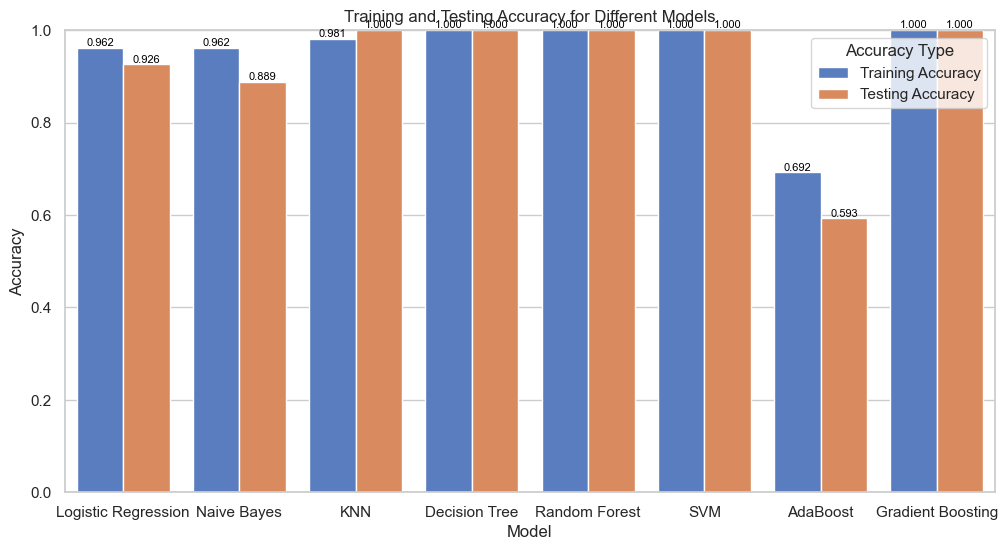

In [127]:
# Barplot displaying accuracy of each model
accuracy_df_melted = accuracy_df.melt('Model', var_name='Accuracy Type', value_name='Accuracy')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=accuracy_df_melted, palette='muted')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')
plt.title('Training and Testing Accuracy for Different Models')
plt.ylim(0, 1)
plt.legend(title='Accuracy Type')
plt.show()

## Deployment

In [128]:
from pickle import dump 

In [129]:
# Dump model file
dump(rf,open('model.pkl','wb'))

In [130]:
# Dump TF-IDF Vectorizer
dump(tfidf_vectorizer,open('vectorizer.pkl','wb'))

In [131]:
# Dump encoder
dump(encoder,open('encoder.pkl','wb'))